In [92]:
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from cvxopt.blas import dot 
import math

In [96]:
std = np.array([0.0042, 0.0033])
corr = np.array([[1,0.7],[0.7,1]])

n = len(mean)
cov = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        cov[i][j] = corr[i][j]*std[i]*std[j]
cov

array([[1.764e-05, 9.702e-06],
       [9.702e-06, 1.089e-05]])

[ 6.44e-07]
[ 1.00e+00]



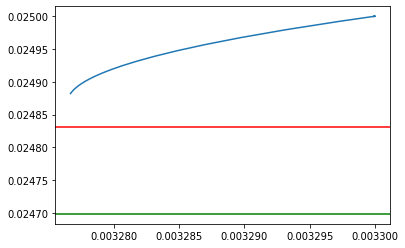

In [157]:
# Portfolio A
mean = np.array([0.024, 0.025])
t = 50
a = 2/t  

P = matrix(a*cov)
q = matrix(-mean)
G = matrix(np.diag([-1.0 for i in range(n)]))
h = matrix(np.array([0.0 for i in range(n)]))
A = matrix(np.array([[1.0 for i in range(n)]]))
b = matrix(np.array([1.0]))

sol = solvers.qp(P,q,G,h,A,b)
solvers.options['show_progress'] = False
w = sol['x']
CE_0 = np.dot(mean,w)[0] - 0.5*a*np.dot(np.dot(w.T, cov), w)[0][0]
print(w)

N = 100
S = matrix(cov)
mus = [10**(5.0*t/N-1.0) for t in range(N)]
solvers.options['show_progress'] = False
xs = [solvers.qp(mu*S, q, G, h, A, b)['x'] for mu in mus]
returns = [dot(-q,x) for x in xs ]
risks = [math.sqrt(dot(x, S*x)) for x in xs]


# #Efficient frontier
plt.plot(risks, returns)
plt.axhline(y=0.024831, color='r')
plt.axhline(y=0.0246986, color='g')

[ 8.31e-01]
[ 1.69e-01]



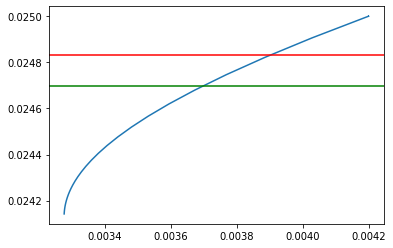

In [158]:
# Portfolio B
mean = np.array([0.025, 0.024])
t = 0.0128
a = 2/t  

P = matrix(a*cov)
q = matrix(-mean)
G = matrix(np.diag([-1.0 for i in range(n)]), tc='d')
h = matrix(np.array([0.0 for i in range(n)]), tc='d')
A = matrix(np.array([[1.0 for i in range(n)]]), tc='d')
b = matrix(np.array([1.0]), tc='d')

sol = solvers.qp(P,q,G,h,A,b)
solvers.options['show_progress'] = False
w = sol['x']
CE_0 = np.dot(mean,w)[0] - 0.5*a*np.dot(np.dot(w.T, cov), w)[0][0]
print(w)

N = 100
S = matrix(cov)
mus = [10**(5.0*t/N-1.0) for t in range(N)]
solvers.options['show_progress'] = False
xs = [solvers.qp(mu*S, q, G, h, A, b)['x'] for mu in mus]
returns = [dot(-q,x) for x in xs ]
risks = [math.sqrt(dot(x, S*x)) for x in xs]

# for x in xs:
#     print (x)

#Efficient frontier
plt.plot(risks, returns)
plt.axhline(y=0.024831, color='r')
plt.axhline(y=0.0246986, color='g')

In [170]:
# Portfolio C
mean = np.array([0.024, 0.025])
t = 1
a = 2/t  

P = matrix(a*cov)
q = matrix(-mean)
G = matrix(np.diag([-1.0 for i in range(n)]), tc='d')
h = matrix(np.array([0.0 for i in range(n)]), tc='d')
# A = matrix(np.array([[1.0 for i in range(n)]]), tc='d')
# b = matrix(np.array([1.0]), tc='d')

sol = solvers.qp(P,q,G,h)
solvers.options['show_progress'] = False
w = sol['x']
CE_0 = np.dot(mean,w)[0] - 0.5*a*np.dot(np.dot(w.T, cov), w)[0][0]
print(w)

[ 9.60e+01]
[ 1.06e+03]



In [169]:
# Portfolio D
mean = np.array([0.025, 0.024])
t = 1
a = 2/t  

P = matrix(a*cov)
q = matrix(-mean)
G = matrix(np.diag([-1.0 for i in range(n)]), tc='d')
h = matrix(np.array([0.0 for i in range(n)]), tc='d')
# A = matrix(np.array([[1.0 for i in range(n)]]), tc='d')
# b = matrix(np.array([100.0]), tc='d')

sol = solvers.qp(P,q,G,h)
solvers.options['show_progress'] = False
w = sol['x']
CE_0 = np.dot(mean,w)[0] - 0.5*a*np.dot(np.dot(w.T, cov), w)[0][0]
print(w)

[ 2.01e+02]
[ 9.23e+02]

